# Bottom Temperature in different regions, Inter-model Comparison

In [1]:
import pandas as pd
from scipy.signal import detrend

import gsw
import glob
import dask.distributed as dsk
import matplotlib.pyplot as plt
import xarray as xr
import cf_xarray as cfxr
import numpy as np
import xesmf as xe

import cmocean as cm
import cartopy.crs as ccrs

import cartopy.feature as cft
import matplotlib.path as mpath

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
import logging
logging.getLogger("matplotlib").setLevel(logging.WARNING)

In [3]:
from dask.distributed import Client
client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37813,Workers: 0
Dashboard: /proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:46329,Total threads: 1
Dashboard: /proxy/43051/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:46247,


In [4]:
# Importing data
pan01_bottemp_1 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Adelie_prescribed_pan01.nc', chunks = 'auto') 
acc_bottemp_1 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Adelie_prescribed_access.nc', chunks = 'auto')

pan01_bottemp_2 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Ross_prescribed_pan01.nc', chunks = 'auto') 
acc_bottemp_2 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Ross_prescribed_access.nc', chunks = 'auto')

pan01_bottemp_3 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Am_prescribed_pan01.nc', chunks = 'auto') 
acc_bottemp_3 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Am_prescribed_access.nc', chunks = 'auto')

pan01_bottemp_4 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Be_prescribed_pan01.nc', chunks = 'auto') 
acc_bottemp_4 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Be_prescribed_access.nc', chunks = 'auto')

pan01_bottemp_5 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Weddell_prescribed_pan01.nc', chunks = 'auto') 
acc_bottemp_5 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Weddell_prescribed_access.nc', chunks = 'auto')

pan01_bottemp_6 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Prydz_prescribed_pan01.nc', chunks = 'auto') 
acc_bottemp_6 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Prydz_prescribed_access.nc', chunks = 'auto')

In [5]:
pan01_bottemp_1_new = pan01_bottemp_1.to_series()
acc_bottemp_1_new = acc_bottemp_1.to_series()

pan01_bottemp_2_new = pan01_bottemp_2.to_series()
acc_bottemp_2_new = acc_bottemp_2.to_series()

pan01_bottemp_3_new = pan01_bottemp_3.to_series()
acc_bottemp_3_new = acc_bottemp_3.to_series()

pan01_bottemp_4_new = pan01_bottemp_4.to_series()
acc_bottemp_4_new = acc_bottemp_4.to_series()

pan01_bottemp_5_new = pan01_bottemp_5.to_series()
acc_bottemp_5_new = acc_bottemp_5.to_series()

pan01_bottemp_6_new = pan01_bottemp_6.to_series()
acc_bottemp_6_new = acc_bottemp_6.to_series()


In [6]:
# Slice 1910–1919 and 2001–2010
pan01_bottemp_1_new = pan01_bottemp_1_new['2001-01-01':'2010-12-16']
pan01_bottemp_2_new = pan01_bottemp_2_new['2001-01-01':'2010-12-16']
pan01_bottemp_3_new = pan01_bottemp_3_new['2001-01-01':'2010-12-16']
pan01_bottemp_4_new = pan01_bottemp_4_new['2001-01-01':'2010-12-16']
pan01_bottemp_5_new = pan01_bottemp_5_new['2001-01-01':'2010-12-16']
pan01_bottemp_6_new = pan01_bottemp_6_new['2001-01-01':'2010-12-16']

acc_bottemp_1_new = acc_bottemp_1_new['1910-01-01':'1919-12-16']
acc_bottemp_2_new = acc_bottemp_2_new['1910-01-01':'1919-12-16']
acc_bottemp_3_new = acc_bottemp_3_new['1910-01-01':'1919-12-16']
acc_bottemp_4_new = acc_bottemp_4_new['1910-01-01':'1919-12-16']
acc_bottemp_5_new = acc_bottemp_5_new['1910-01-01':'1919-12-16']
acc_bottemp_6_new = acc_bottemp_6_new['1910-01-01':'1919-12-16']

In [7]:
# Reset index to normalized months
pan01_bottemp_1_new.index = range(0, len(pan01_bottemp_1_new))
acc_bottemp_1_new.index = range(0, len(acc_bottemp_1_new))

pan01_bottemp_2_new.index = range(0, len(pan01_bottemp_2_new))
acc_bottemp_2_new.index = range(0, len(acc_bottemp_2_new))

pan01_bottemp_3_new.index = range(0, len(pan01_bottemp_3_new))
acc_bottemp_3_new.index = range(0, len(acc_bottemp_3_new))

pan01_bottemp_4_new.index = range(0, len(pan01_bottemp_4_new))
acc_bottemp_4_new.index = range(0, len(acc_bottemp_4_new))

pan01_bottemp_5_new.index = range(0, len(pan01_bottemp_5_new))
acc_bottemp_5_new.index = range(0, len(acc_bottemp_5_new))

pan01_bottemp_6_new.index = range(0, len(pan01_bottemp_6_new))
acc_bottemp_6_new.index = range(0, len(acc_bottemp_6_new))

### Regular plot

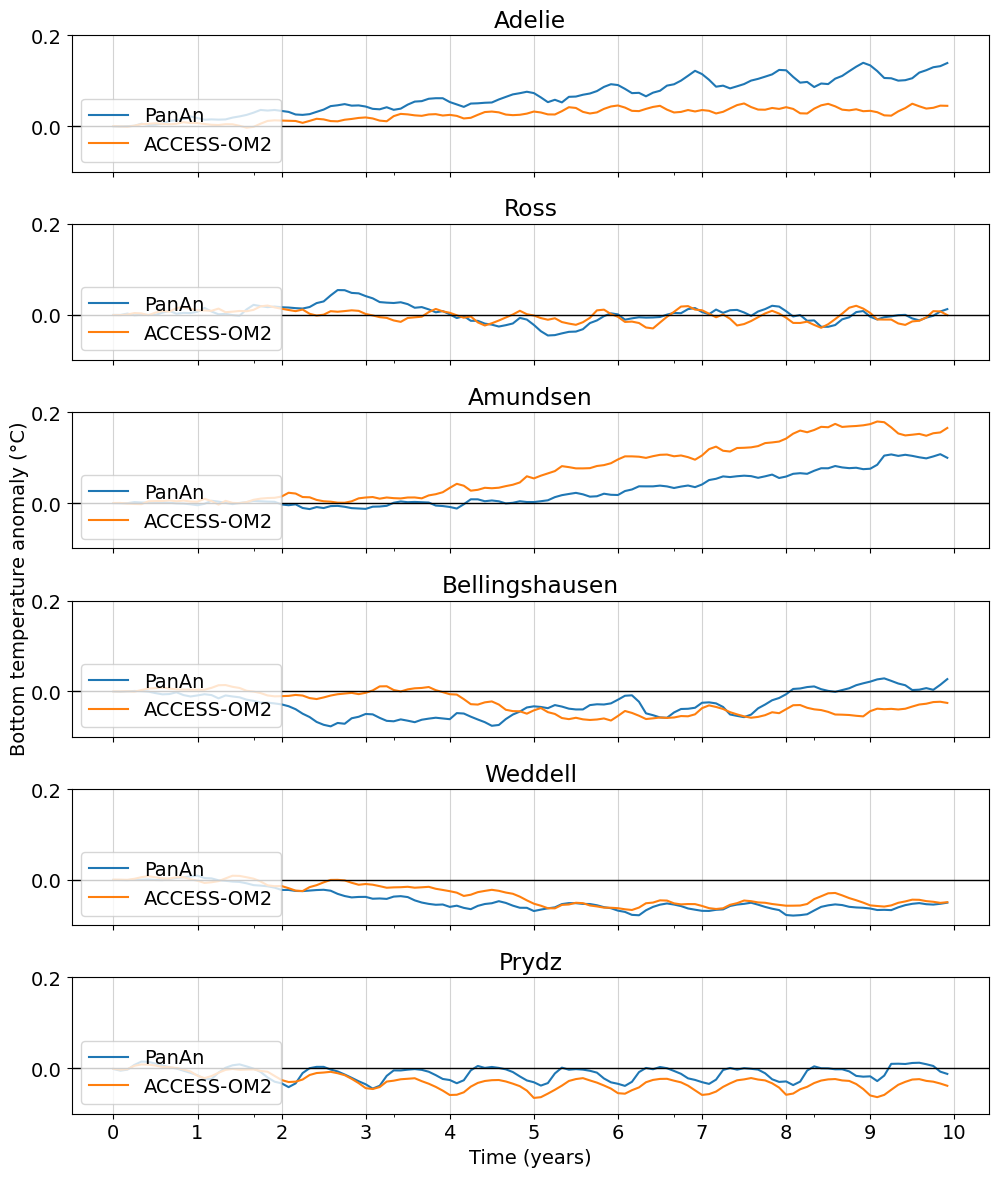

In [8]:
plt.rcParams['font.size'] = 14

fig, axes = plt.subplots(
    nrows=6, ncols=1,
    sharex=True, figsize=(10, 12)
)

# First subplot: 
pan01_bottemp_1_new.plot(ax=axes[0], label="PanAn")
acc_bottemp_1_new.plot(ax=axes[0], label="ACCESS-OM2")
axes[0].legend(loc="lower left")
axes[0].set_title("Adelie")

# Second subplot: 
pan01_bottemp_2_new.plot(ax=axes[1], label="PanAn")
acc_bottemp_2_new.plot(ax=axes[1], label="ACCESS-OM2")
axes[1].legend(loc="lower left")
axes[1].set_title("Ross")

# Third subplot: 
pan01_bottemp_3_new.plot(ax=axes[2], label="PanAn")
acc_bottemp_3_new.plot(ax=axes[2], label="ACCESS-OM2")
axes[2].legend(loc="lower left")
axes[2].set_title("Amundsen")

# Fourth subplot: 
pan01_bottemp_4_new.plot(ax=axes[3], label="PanAn")
acc_bottemp_4_new.plot(ax=axes[3], label="ACCESS-OM2")
axes[3].legend(loc="lower left")
axes[3].set_title("Bellingshausen")

# Fifth subplot: 
pan01_bottemp_5_new.plot(ax=axes[4], label="PanAn")
acc_bottemp_5_new.plot(ax=axes[4], label="ACCESS-OM2")
axes[4].legend(loc="lower left")
axes[4].set_title("Weddell")

# Sixth subplot: 
pan01_bottemp_6_new.plot(ax=axes[5], label="PanAn")
acc_bottemp_6_new.plot(ax=axes[5], label="ACCESS-OM2")
axes[5].legend(loc="lower left")
axes[5].set_title("Prydz")

# Apply consistent y-limits and horizontal line for all subplots
for ax in axes:
    ax.axhline(y=0, color='black', linewidth=1)
    ax.set_ylim(-0.1, 0.2)
    ax.grid(True, color='lightgrey')

# Common X-axis label
axes[-1].set_xlabel("Time (years)")

# Common Y-axis label
fig.text(0, 0.5, "Bottom temperature anomaly (°C)", va='center', rotation='vertical')

# Set ticks every 12 months but label in years
ticks = range(0, 121, 12)  # 0 to 120 months
labels = [str(i) for i in range(len(ticks))]
plt.xticks(ticks=ticks, labels=labels)

# Adjust layout
plt.tight_layout()
plt.show()

### 12-month running mean

In [9]:
# Compute 12-month running means
pan01_bottemp_1_rm = pan01_bottemp_1_new.rolling(window=12, center=True).mean()
acc_bottemp_1_rm = acc_bottemp_1_new.rolling(window=12, center=True).mean()

pan01_bottemp_2_rm = pan01_bottemp_2_new.rolling(window=12, center=True).mean()
acc_bottemp_2_rm = acc_bottemp_2_new.rolling(window=12, center=True).mean()

pan01_bottemp_3_rm = pan01_bottemp_3_new.rolling(window=12, center=True).mean()
acc_bottemp_3_rm = acc_bottemp_3_new.rolling(window=12, center=True).mean()

pan01_bottemp_4_rm = pan01_bottemp_4_new.rolling(window=12, center=True).mean()
acc_bottemp_4_rm = acc_bottemp_4_new.rolling(window=12, center=True).mean()

pan01_bottemp_5_rm = pan01_bottemp_5_new.rolling(window=12, center=True).mean()
acc_bottemp_5_rm = acc_bottemp_5_new.rolling(window=12, center=True).mean()

pan01_bottemp_6_rm = pan01_bottemp_6_new.rolling(window=12, center=True).mean()
acc_bottemp_6_rm = acc_bottemp_6_new.rolling(window=12, center=True).mean()

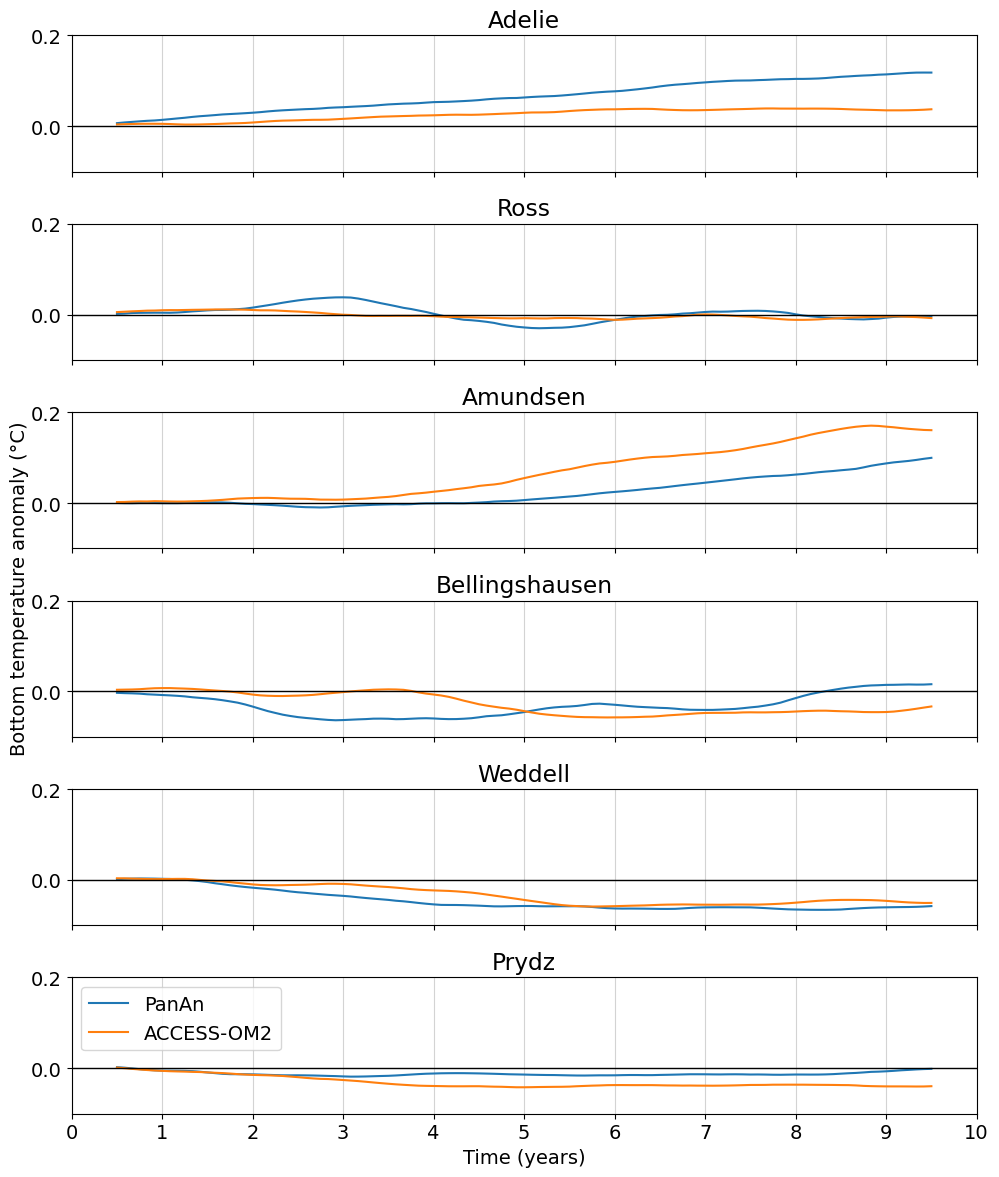

In [10]:
plt.rcParams['font.size'] = 14
# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=1, sharex=True, figsize=(10, 12))

region_titles = ["Adelie", "Ross", "Amundsen", "Bellingshausen", "Weddell", "Prydz"]
pan01_rms = [pan01_bottemp_1_rm, pan01_bottemp_2_rm, pan01_bottemp_3_rm, pan01_bottemp_4_rm, pan01_bottemp_5_rm, pan01_bottemp_6_rm]
acc_rms = [acc_bottemp_1_rm, acc_bottemp_2_rm, acc_bottemp_3_rm, acc_bottemp_4_rm, acc_bottemp_5_rm, acc_bottemp_6_rm]

for i, ax in enumerate(axes):
    ax.plot(pan01_rms[i].index, pan01_rms[i], label="PanAn")
    ax.plot(acc_rms[i].index, acc_rms[i], label="ACCESS-OM2")
    #ax.legend(loc="")
    ax.set_title(region_titles[i])
    ax.axhline(y=0, color='black', linewidth=1)
    ax.set_ylim(-0.1, 0.2)
    ax.grid(True, color='lightgrey')

axes[-1].legend(loc="upper left",fontsize=14)

# Set ticks every 12 months but label in years
ticks = range(0, 121, 12)  # 0 to 120 months
labels = [str(i) for i in range(len(ticks))]
plt.xticks(ticks=ticks, labels=labels)

# Common X-axis label
axes[-1].set_xlabel("Time (years)")

# Common Y-axis label
fig.text(0, 0.5, "Bottom temperature anomaly (°C)", va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()
plt.show()

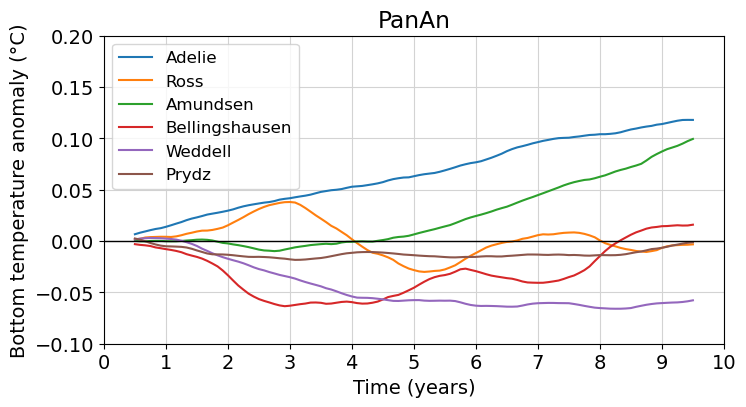

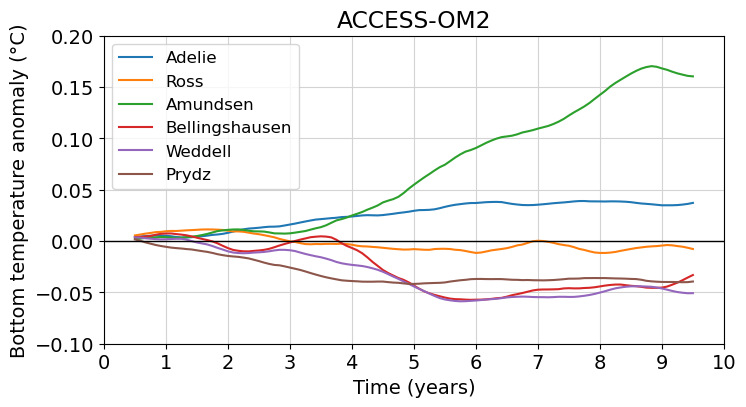

In [28]:
plt.rcParams['font.size'] = 14

# --- Plot for all 1/10th-degree regions ---
plt.figure(figsize=(8,4))
plt.ylim(-0.1, 0.2)
for rms, title in zip(pan01_rms, region_titles):
    plt.plot(rms.index, rms, label=title)
plt.axhline(0, color='black', linewidth=1)

# Set ticks every 12 months but label in years
ticks = range(0, 121, 12)  # 0 to 120 months
labels = [str(i) for i in range(len(ticks))]
plt.xticks(ticks=ticks, labels=labels)

plt.xlabel("Time (years)")
plt.ylabel("Bottom temperature anomaly (°C)")
plt.title("PanAn")
plt.legend(fontsize=12)
plt.grid(True, color='lightgrey')
plt.show()

# --- Plot for all 1/20th-degree regions ---
plt.figure(figsize=(8,4))
plt.ylim(-0.1, 0.2)
for rms, title in zip(acc_rms, region_titles):
    plt.plot(rms.index, rms, label=title)
plt.axhline(0, color='black', linewidth=1)

# Set ticks every 12 months but label in years
ticks = range(0, 121, 12)  # 0 to 120 months
labels = [str(i) for i in range(len(ticks))]
plt.xticks(ticks=ticks, labels=labels)



plt.xlabel("Time (years)")
plt.ylabel("Bottom temperature anomaly (°C)")
plt.title("ACCESS-OM2")
plt.legend(fontsize=12)
plt.grid(True, color='lightgrey')
plt.show()